In [11]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import numpy as np
import cv2

#얼굴 추출하기위한 데이터 파일
CASC_PATH = './emotion-recognition/haarcascade_frontalface_default.xml'
cascade_classifier = cv2.CascadeClassifier(CASC_PATH)
SIZE_FACE = 48
EMOTIONS = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [12]:
def format_image(image):
  if len(image.shape) > 2 and image.shape[2] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  else:
    image = cv2.imdecode(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
  faces = cascade_classifier.detectMultiScale(
      image,
      scaleFactor = 1.3,
      minNeighbors = 5
  )
  # None is we don't found an image
  if not len(faces) > 0:
    return None
  max_area_face = faces[0]
  for face in faces:
    if face[2] * face[3] > max_area_face[2] * max_area_face[3]:
      max_area_face = face
  # Chop image to face
  face = max_area_face
  image = image[face[1]:(face[1] + face[2]), face[0]:(face[0] + face[3])]
  # Resize image to network size
  try:
    image = cv2.resize(image, (SIZE_FACE, SIZE_FACE), interpolation = cv2.INTER_CUBIC) / 255.
  except Exception:
    print("[+] Problem during resize")
    return None
  # cv2.imshow("Lol", image)
  # cv2.waitKey(0)
  return image

In [13]:
#Image Check
import os, random
dir_name = "/home/ryan/Pictures/momca_pic"
"""0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral"""
folder_names = ["0","1","2","3","4","5","6"]
for folder_name in folder_names :
    print ("folder_name : " + folder_name)
    im_name = random.choice(os.listdir(dir_name+ "/" + folder_name))
    print("im_name : " + im_name)
    im_file = dir_name + "/" +folder_name + "/"  +im_name
    print("im_file : " + im_file)
    readImage = cv.imread(im_file)
    if readImage is None :
        print("readImage is None")
        continue
    
    formatImage = format_image(cv.imread(im_file))
    try:
        plt.imsave('reshapeImage.png', formatImage, cmap=cm.gray)
    except:
        print("pass cause exception")
        continue
    im_file = "./reshapeImage.png"
    display(Image(filename=im_file))

folder_name : 0
im_name : 임도연_5.jpg
im_file : /home/ryan/Pictures/momca_pic/0/임도연_5.jpg


NameError: name 'cv' is not defined

In [84]:
pixel_depth = 255.0  # Number of levels per pixel.
train_folders = ['emotion-recognition/0', 'emotion-recognition/1', 'emotion-recognition/2', 'emotion-recognition/3', 'emotion-recognition/4', 'emotion-recognition/5', 'emotion-recognition/6']


def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), SIZE_FACE, SIZE_FACE),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      
    
      SourceImage = cv.imread(image_file)
      if SourceImage is None :
        continue
      print('SourceImage',SourceImage.shape)
      image_data = format_image(SourceImage)
      if image_data is None :
        continue
      print('image_data shape',image_data.shape)
      
   
        
      if image_data.shape != (SIZE_FACE, SIZE_FACE):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 1)

Pickling emotion-recognition/0.pickle.
emotion-recognition/0
SourceImage (450, 750, 3)
SourceImage (813, 1024, 3)
SourceImage (1199, 1601, 3)
image_data shape (32, 32)
SourceImage (2000, 3000, 3)
SourceImage (749, 1123, 3)
image_data shape (32, 32)
SourceImage (1360, 2048, 3)
image_data shape (32, 32)
SourceImage (555, 800, 3)
image_data shape (32, 32)
SourceImage (770, 1012, 3)
SourceImage (1400, 2800, 3)
image_data shape (32, 32)
SourceImage (565, 849, 3)
image_data shape (32, 32)
SourceImage (800, 979, 3)
image_data shape (32, 32)
SourceImage (300, 300, 3)
image_data shape (32, 32)
SourceImage (450, 600, 3)
SourceImage (309, 388, 3)
image_data shape (32, 32)
SourceImage (2667, 4000, 3)
image_data shape (32, 32)
SourceImage (1129, 1600, 3)
image_data shape (32, 32)
SourceImage (1131, 1698, 3)
image_data shape (32, 32)
SourceImage (533, 800, 3)
image_data shape (32, 32)
Full dataset tensor: (13, 32, 32)
Mean: 0.606231
Standard deviation: 0.217711
Pickling emotion-recognition/1.pickle.

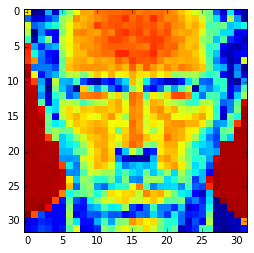

In [91]:
# first load the pickle file, loading one for illustration purpose
t = pickle.load(open("emotion-recognition/4.pickle", "r"))
# need to use matplotlib inline if want to show at jupyter Notebook
%matplotlib inline
# plot one of image. the number 5 to be exactly
plt.imshow(t[3], interpolation='nearest')
# show the image
plt.show()